# Predicting Draft Picks

Now that I have all my data, I need to combine my two dataframes and start cleaning. I load in my necessary libraries and read in the two csv files saved off in my web scraping notebook.

In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import missingno as mno

import warnings
warnings.simplefilter('ignore')

In [232]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# setting format for readability
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Combine Results

In [233]:
combine = pd.read_csv('../mod5project/csv_files/2000-2020_nfl_combine_data.csv', index_col = 0)
combine.head()

,Link,PlayerName,Position,School,CollegeStats,Height,Weight,40yd,Vertical,Bench,BroadJump,3Cone,Shuttle,Drafted,CombineYear,Draft Team,Round,Pick,Draft Year
0,https://www.pro-football-reference.com/draft/2...,John Abraham,OLB,South Carolina,/td,6-4,252,4.55,nan,nan,nan,nan,nan,New York Jets / 1st / 13th pick / 2000,2000,New York Jets,1st,13th pick,2000
1,https://www.pro-football-reference.com/draft/2...,Shaun Alexander,RB,Alabama,https://www.sports-reference.com/cfb/players/s...,6-0,218,4.58,nan,nan,nan,nan,nan,Seattle Seahawks / 1st / 19th pick / 2000,2000,Seattle Seahawks,1st,19th pick,2000
2,https://www.pro-football-reference.com/draft/2...,Darnell Alford,OT,Boston Col.,/td,6-4,334,5.56,25.00,23.00,94.00,8.48,4.98,Kansas City Chiefs / 6th / 188th pick / 2000,2000,Kansas City Chiefs,6th,188th pick,2000
3,https://www.pro-football-reference.com/draft/2...,Kyle Allamon,TE,Texas Tech,/td,6-2,253,4.97,29.00,nan,104.00,7.29,4.49,NaN,2000,NaN,Not Drafted,Not Drafted,Not Drafted
4,https://www.pro-football-reference.com/draft/2...,Rashard Anderson,CB,Jackson State,/td,6-2,206,4.55,34.00,nan,123.00,7.18,4.15,Carolina Panthers / 1st / 23rd pick / 2000,2000,Carolina Panthers,1st,23rd pick,2000


Before I merge the dataframes, I want to handle my null values for the combine results. Originally I thought to replace the values with 0, but that doesn't make sense for some of the events. 0 could indicate excellent performance or rather tragic performance. So instead of replacing the values with 0, I replaced each of the missing values with teh average for a given position. In the instance that a QB is missing his Vertical, the value now reads as the average Vertical for Quarterbacks. I penalized this average since I didn't want it to muddle the actual results.

It doesn't look pretty but it works.

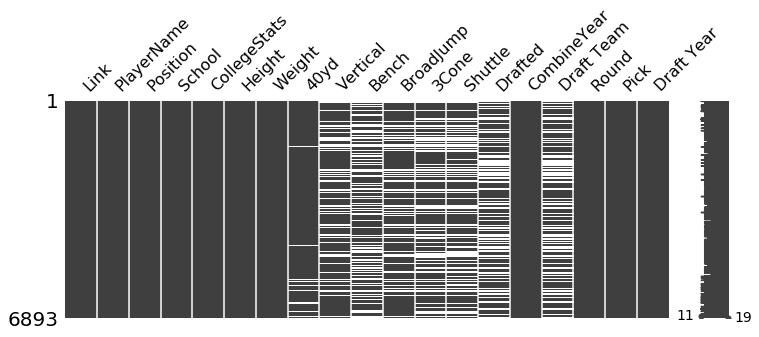

In [234]:
mno.matrix(combine, figsize = (12, 4))
plt.show()

In [235]:
combine['Drafted'].fillna('Not Drafted', inplace=True)

In [236]:
combine['Draft Team'].fillna('Not Drafted', inplace=True)

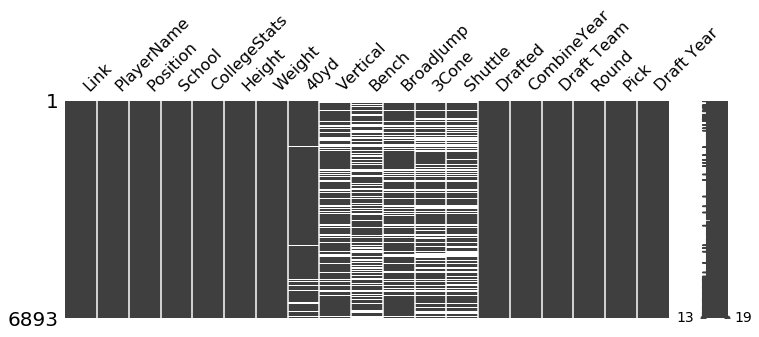

In [237]:
mno.matrix(combine, figsize = (12, 4))
plt.show()

In [238]:
combine.fillna('Did Not Participate', inplace=True)
combine.head(10)

,Link,PlayerName,Position,School,CollegeStats,Height,Weight,40yd,Vertical,Bench,BroadJump,3Cone,Shuttle,Drafted,CombineYear,Draft Team,Round,Pick,Draft Year
0,https://www.pro-football-reference.com/draft/2...,John Abraham,OLB,South Carolina,/td,6-4,252,4.55,Did Not Participate,Did Not Participate,Did Not Participate,Did Not Participate,Did Not Participate,New York Jets / 1st / 13th pick / 2000,2000,New York Jets,1st,13th pick,2000
1,https://www.pro-football-reference.com/draft/2...,Shaun Alexander,RB,Alabama,https://www.sports-reference.com/cfb/players/s...,6-0,218,4.58,Did Not Participate,Did Not Participate,Did Not Participate,Did Not Participate,Did Not Participate,Seattle Seahawks / 1st / 19th pick / 2000,2000,Seattle Seahawks,1st,19th pick,2000
2,https://www.pro-football-reference.com/draft/2...,Darnell Alford,OT,Boston Col.,/td,6-4,334,5.56,25.00,23.00,94.00,8.48,4.98,Kansas City Chiefs / 6th / 188th pick / 2000,2000,Kansas City Chiefs,6th,188th pick,2000
3,https://www.pro-football-reference.com/draft/2...,Kyle Allamon,TE,Texas Tech,/td,6-2,253,4.97,29.00,Did Not Participate,104.00,7.29,4.49,Not Drafted,2000,Not Drafted,Not Drafted,Not Drafted,Not Drafted
4,https://www.pro-football-reference.com/draft/2...,Rashard Anderson,CB,Jackson State,/td,6-2,206,4.55,34.00,Did Not Participate,123.00,7.18,4.15,Carolina Panthers / 1st / 23rd pick / 2000,2000,Carolina Panthers,1st,23rd pick,2000
5,https://www.pro-football-reference.com/draft/2...,Jake Arians,K,Ala-Birmingham,/td,5-10,202,Did Not Participate,Did Not Participate,Did Not Participate,Did Not Participate,Did Not Participate,Did Not Participate,Not Drafted,2000,Not Drafted,Not Drafted,Not Drafted,Not Drafted
6,https://www.pro-football-reference.com/draft/2...,LaVar Arrington,OLB,Penn State,https://www.sports-reference.com/cfb/players/l...,6-3,250,4.53,Did Not Participate,Did Not Participate,Did Not Participate,Did Not Participate,Did Not Participate,Washington Redskins / 1st / 2nd pick / 2000,2000,Washington Redskins,1st,2nd pick,2000
7,https://www.pro-football-reference.com/draft/2...,Corey Atkins,OLB,South Carolina,/td,6-0,237,4.72,31.00,21.00,112.00,7.96,4.39,Not Drafted,2000,Not Drafted,Not Drafted,Not Drafted,Not Drafted
8,https://www.pro-football-reference.com/draft/2...,Kyle Atteberry,K,Baylor,/td,6-0,167,Did Not Participate,Did Not Participate,Did Not Participate,Did Not Participate,Did Not Participate,Did Not Participate,Not Drafted,2000,Not Drafted,Not Drafted,Not Drafted,Not Drafted
9,https://www.pro-football-reference.com/draft/2...,Reggie Austin,CB,Wake Forest,/td,5-9,175,4.44,35.00,17.00,119.00,7.03,4.14,Chicago Bears / 4th / 125th pick / 2000,2000,Chicago Bears,4th,125th pick,2000


In [239]:
def spot_mean(spot, feature):
        data = combine[combine['Position'] == spot]
        data = data[data[feature] != 'Did Not Participate']
        mean = data[feature].mean()
        return mean   

In [240]:
new_40yd = []
new_Vertical = []
new_Bench = []
new_BroadJump = []
new_3Cone = []
new_Shuttle = []


def update_combine_nulls(new_list, feature):
    for i in combine[['Position', feature]].values:
        lst = i
        if lst[1] == 'Did Not Participate':
            perf = spot_mean(lst[0], feature) * .5
            new_list.append(perf)
        else:
            perf = lst[1]
            new_list.append(perf)
        
update_combine_nulls(new_40yd, '40yd')
update_combine_nulls(new_Vertical, 'Vertical')
update_combine_nulls(new_Bench, 'Bench')
update_combine_nulls(new_BroadJump, 'BroadJump')
update_combine_nulls(new_3Cone, '3Cone')
update_combine_nulls(new_Shuttle, 'Shuttle')

In [241]:
combine['40yd'] = new_40yd

In [242]:
combine['Vertical'] = new_Vertical

In [243]:
combine['Bench'] = new_Bench

In [244]:
combine['BroadJump'] = new_BroadJump

In [245]:
combine['3Cone'] = new_3Cone

In [246]:
combine['Shuttle'] = new_Shuttle

In [247]:
combine.columns

Index(['Link', 'PlayerName', 'Position', 'School', 'CollegeStats', 'Height',
       'Weight', '40yd', 'Vertical', 'Bench', 'BroadJump', '3Cone', 'Shuttle',
       'Drafted', 'CombineYear', 'Draft Team', 'Round', 'Pick', 'Draft Year'],
      dtype='object')

In [248]:
combine.head(10)

,Link,PlayerName,Position,School,CollegeStats,Height,Weight,40yd,Vertical,Bench,BroadJump,3Cone,Shuttle,Drafted,CombineYear,Draft Team,Round,Pick,Draft Year
0,https://www.pro-football-reference.com/draft/2...,John Abraham,OLB,South Carolina,/td,6-4,252,4.55,17.25,11.27,58.80,3.57,2.14,New York Jets / 1st / 13th pick / 2000,2000,New York Jets,1st,13th pick,2000
1,https://www.pro-football-reference.com/draft/2...,Shaun Alexander,RB,Alabama,https://www.sports-reference.com/cfb/players/s...,6-0,218,4.58,17.23,9.70,59.13,3.53,2.13,Seattle Seahawks / 1st / 19th pick / 2000,2000,Seattle Seahawks,1st,19th pick,2000
2,https://www.pro-football-reference.com/draft/2...,Darnell Alford,OT,Boston Col.,/td,6-4,334,5.56,25.00,23.00,94.00,8.48,4.98,Kansas City Chiefs / 6th / 188th pick / 2000,2000,Kansas City Chiefs,6th,188th pick,2000
3,https://www.pro-football-reference.com/draft/2...,Kyle Allamon,TE,Texas Tech,/td,6-2,253,4.97,29.00,10.11,104.00,7.29,4.49,Not Drafted,2000,Not Drafted,Not Drafted,Not Drafted,Not Drafted
4,https://www.pro-football-reference.com/draft/2...,Rashard Anderson,CB,Jackson State,/td,6-2,206,4.55,34.00,7.24,123.00,7.18,4.15,Carolina Panthers / 1st / 23rd pick / 2000,2000,Carolina Panthers,1st,23rd pick,2000
5,https://www.pro-football-reference.com/draft/2...,Jake Arians,K,Ala-Birmingham,/td,5-10,202,2.46,16.75,8.00,56.75,nan,nan,Not Drafted,2000,Not Drafted,Not Drafted,Not Drafted,Not Drafted
6,https://www.pro-football-reference.com/draft/2...,LaVar Arrington,OLB,Penn State,https://www.sports-reference.com/cfb/players/l...,6-3,250,4.53,17.25,11.27,58.80,3.57,2.14,Washington Redskins / 1st / 2nd pick / 2000,2000,Washington Redskins,1st,2nd pick,2000
7,https://www.pro-football-reference.com/draft/2...,Corey Atkins,OLB,South Carolina,/td,6-0,237,4.72,31.00,21.00,112.00,7.96,4.39,Not Drafted,2000,Not Drafted,Not Drafted,Not Drafted,Not Drafted
8,https://www.pro-football-reference.com/draft/2...,Kyle Atteberry,K,Baylor,/td,6-0,167,2.46,16.75,8.00,56.75,nan,nan,Not Drafted,2000,Not Drafted,Not Drafted,Not Drafted,Not Drafted
9,https://www.pro-football-reference.com/draft/2...,Reggie Austin,CB,Wake Forest,/td,5-9,175,4.44,35.00,17.00,119.00,7.03,4.14,Chicago Bears / 4th / 125th pick / 2000,2000,Chicago Bears,4th,125th pick,2000


Link             0
PlayerName       0
Position         0
School           0
CollegeStats     0
Height           0
Weight           0
40yd             0
Vertical         0
Bench            0
BroadJump        0
3Cone           94
Shuttle         91
Drafted          0
CombineYear      0
Draft Team       0
Round            0
Pick             0
Draft Year       0
dtype: int64


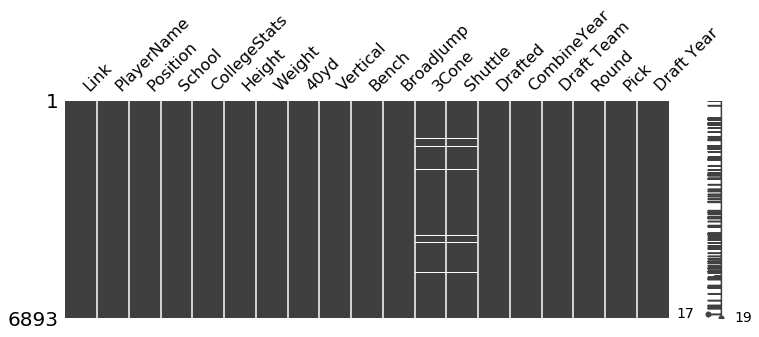

In [249]:
mno.matrix(combine, figsize = (12, 4))
print(combine.isnull().sum())
plt.show()

There are still some null values - these are where there are no observations for the position. I feel okay to replace these with 0 when I fill all remaining NAs.

### College Stats

In [250]:
collegestats = pd.read_csv('../mod5project/csv_files/college_stats_final.csv', index_col = 0)
collegestats.head()

,Link,Defense_Games,Solo_Tackles,Assisted_Tackles,Ttl_Tackles,Loss,Sacks,Defensive_Interceptions,Def_Int_Yds,Yds_per_Int,Pick_6,Defended_Passes,Recovered_Fumbles,Rec_Fumbles_Yds,Fumbles_Returned_TD,Forced_Fumbles,Passing_Games,Completions,Pass_Attempts,Completion_Percent,Pass_Yards,Pass_Yds_per_Attempt,Adj_Pass_Yds_per_Attempt,Pass_TDs,Pass_Interceptions,Passer_Rating,Rushing/Receiving_Games,Rush_Attempts,Rush_Yds,Rush_Yds_per_Attempt,Rush_TDs,Receptions,Rec_Yds,Rec_Yds_per_Reception,Rec_TDs,Plays_from_Scrimmage,Scrimmage_Yds,Scrimmage_Yds_per_Attempt,Scrimmage_TDs,Kicking_Games,XP_Made,XP_Attempts,XP_Percent,FG_Made,FG_Attempts,FG_Percent,TTL_Kicking_Points,#Punts,Punt_Yds,Yds_per_Punt,PuntRet_Games,Punt_Returns,Punt_Return_Yds,Yrds_per_Return,Punt_Returned_for_TD,Kickoff_Returns,KO_Return_Yds,Yds_per_KO_Return,KO_Returned_for_TD,Scoring_Games,TD_Other,Ttl_TDs,2PT_Converstions,Safety,TTL_Points
0,https://www.sports-reference.com/cfb/players/s...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,302.00,1383.00,4.60,19.00,25.00,323.00,12.90,4.00,327,1706,5.20,23,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,nan,24.00,nan,nan,144
1,https://www.sports-reference.com/cfb/players/l...,12.00,nan,nan,nan,nan,nan,1.00,27.00,27.00,0.00,nan,nan,nan,nan,nan,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0.00,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12.00,nan,0.00,nan,nan,0
2,https://www.sports-reference.com/cfb/players/j...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,1.00,1.00,100.00,27.00,27.00,27.00,0.00,0.00,326.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0.00,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
3,https://www.sports-reference.com/cfb/players/a...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0.00,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,nan,5.00,nan,nan,30
4,https://www.sports-reference.com/cfb/players/t...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,180.00,295.00,61.00,2217.00,7.50,7.70,16.00,6.00,138.00,11.00,34.00,-31.00,-0.90,1.00,nan,nan,nan,nan,34,-31,-0.90,1,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,nan,1.00,nan,nan,6


I decided to rename my 'Link' column in my collegestats dataframe. This is the column I'll merge my two dataframes on and having the same name keeps things clear for me. The name doesn't have to be the same, but again it's just for clarity on my end.

In [251]:
collegestats.rename({'Link': 'CollegeStats'}, axis=1, inplace=True)
collegestats.head()

,CollegeStats,Defense_Games,Solo_Tackles,Assisted_Tackles,Ttl_Tackles,Loss,Sacks,Defensive_Interceptions,Def_Int_Yds,Yds_per_Int,Pick_6,Defended_Passes,Recovered_Fumbles,Rec_Fumbles_Yds,Fumbles_Returned_TD,Forced_Fumbles,Passing_Games,Completions,Pass_Attempts,Completion_Percent,Pass_Yards,Pass_Yds_per_Attempt,Adj_Pass_Yds_per_Attempt,Pass_TDs,Pass_Interceptions,Passer_Rating,Rushing/Receiving_Games,Rush_Attempts,Rush_Yds,Rush_Yds_per_Attempt,Rush_TDs,Receptions,Rec_Yds,Rec_Yds_per_Reception,Rec_TDs,Plays_from_Scrimmage,Scrimmage_Yds,Scrimmage_Yds_per_Attempt,Scrimmage_TDs,Kicking_Games,XP_Made,XP_Attempts,XP_Percent,FG_Made,FG_Attempts,FG_Percent,TTL_Kicking_Points,#Punts,Punt_Yds,Yds_per_Punt,PuntRet_Games,Punt_Returns,Punt_Return_Yds,Yrds_per_Return,Punt_Returned_for_TD,Kickoff_Returns,KO_Return_Yds,Yds_per_KO_Return,KO_Returned_for_TD,Scoring_Games,TD_Other,Ttl_TDs,2PT_Converstions,Safety,TTL_Points
0,https://www.sports-reference.com/cfb/players/s...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,302.00,1383.00,4.60,19.00,25.00,323.00,12.90,4.00,327,1706,5.20,23,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,nan,24.00,nan,nan,144
1,https://www.sports-reference.com/cfb/players/l...,12.00,nan,nan,nan,nan,nan,1.00,27.00,27.00,0.00,nan,nan,nan,nan,nan,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0.00,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12.00,nan,0.00,nan,nan,0
2,https://www.sports-reference.com/cfb/players/j...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,1.00,1.00,100.00,27.00,27.00,27.00,0.00,0.00,326.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0.00,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
3,https://www.sports-reference.com/cfb/players/a...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0.00,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,nan,5.00,nan,nan,30
4,https://www.sports-reference.com/cfb/players/t...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,180.00,295.00,61.00,2217.00,7.50,7.70,16.00,6.00,138.00,11.00,34.00,-31.00,-0.90,1.00,nan,nan,nan,nan,34,-31,-0.90,1,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,nan,1.00,nan,nan,6


In [198]:
df = pd.merge(combine, collegestats, how='left', left_on='CollegeStats', right_on='CollegeStats', )

# check out the newly merged dataframe
print(df.shape)
df.head()

(6899, 83)


,Link,PlayerName,Position,School,CollegeStats,Height,Weight,40yd,Vertical,Bench,BroadJump,3Cone,Shuttle,Drafted,CombineYear,Draft Team,Round,Pick,Draft Year,Defense_Games,Solo_Tackles,Assisted_Tackles,Ttl_Tackles,Loss,Sacks,Defensive_Interceptions,Def_Int_Yds,Yds_per_Int,Pick_6,Defended_Passes,Recovered_Fumbles,Rec_Fumbles_Yds,Fumbles_Returned_TD,Forced_Fumbles,Passing_Games,Completions,Pass_Attempts,Completion_Percent,Pass_Yards,Pass_Yds_per_Attempt,Adj_Pass_Yds_per_Attempt,Pass_TDs,Pass_Interceptions,Passer_Rating,Rushing/Receiving_Games,Rush_Attempts,Rush_Yds,Rush_Yds_per_Attempt,Rush_TDs,Receptions,Rec_Yds,Rec_Yds_per_Reception,Rec_TDs,Plays_from_Scrimmage,Scrimmage_Yds,Scrimmage_Yds_per_Attempt,Scrimmage_TDs,Kicking_Games,XP_Made,XP_Attempts,XP_Percent,FG_Made,FG_Attempts,FG_Percent,TTL_Kicking_Points,#Punts,Punt_Yds,Yds_per_Punt,PuntRet_Games,Punt_Returns,Punt_Return_Yds,Yrds_per_Return,Punt_Returned_for_TD,Kickoff_Returns,KO_Return_Yds,Yds_per_KO_Return,KO_Returned_for_TD,Scoring_Games,TD_Other,Ttl_TDs,2PT_Converstions,Safety,TTL_Points
0,https://www.pro-football-reference.com/draft/2...,John Abraham,OLB,South Carolina,/td,6-4,252,4.55,17.25,11.27,58.80,3.57,2.14,New York Jets / 1st / 13th pick / 2000,2000,New York Jets,1st,13th pick,2000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,https://www.pro-football-reference.com/draft/2...,Shaun Alexander,RB,Alabama,https://www.sports-reference.com/cfb/players/s...,6-0,218,4.58,17.23,9.70,59.13,3.53,2.13,Seattle Seahawks / 1st / 19th pick / 2000,2000,Seattle Seahawks,1st,19th pick,2000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,302.00,1383.00,4.60,19.00,25.00,323.00,12.90,4.00,327.00,1706.00,5.20,23.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,nan,24.00,nan,nan,144.00
2,https://www.pro-football-reference.com/draft/2...,Darnell Alford,OT,Boston Col.,/td,6-4,334,5.56,25.00,23.00,94.00,8.48,4.98,Kansas City Chiefs / 6th / 188th pick / 2000,2000,Kansas City Chiefs,6th,188th pick,2000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,https://www.pro-football-reference.com/draft/2...,Kyle Allamon,TE,Texas Tech,/td,6-2,253,4.97,29.00,10.11,104.00,7.29,4.49,Not Drafted,2000,Not Drafted,Not Drafted,Not Drafted,Not Drafted,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,https://www.pro-football-reference.com/draft/2...,Rashard Anderson,CB,Jackson State,/td,6-2,206,4.55,34.00,7.24,123.00,7.18,4.15,Carolina Panthers / 1st / 23rd pick / 2000,2000,Carolina Panthers,1st,23rd pick,2000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [199]:
# pickle combined data to keep it stored

df.to_pickle('pickle_files/combined_data')

Not all of my original data points had the college stats available. From here on, I'll only want to look at the observations that I was able to get the additional information on. I also go ahead and drop the 'Link', 'CollegeStats' and 'Drafted' columns. I've taken what I need from these columns and they don't need to be included from here on out.

In [200]:
draft_data = df[df['CollegeStats'] != '/td']
draft_data.drop(columns=['Link', 'CollegeStats', 'Drafted'], inplace=True)
print(draft_data.shape)
draft_data.head()

(5492, 80)


,PlayerName,Position,School,Height,Weight,40yd,Vertical,Bench,BroadJump,3Cone,Shuttle,CombineYear,Draft Team,Round,Pick,Draft Year,Defense_Games,Solo_Tackles,Assisted_Tackles,Ttl_Tackles,Loss,Sacks,Defensive_Interceptions,Def_Int_Yds,Yds_per_Int,Pick_6,Defended_Passes,Recovered_Fumbles,Rec_Fumbles_Yds,Fumbles_Returned_TD,Forced_Fumbles,Passing_Games,Completions,Pass_Attempts,Completion_Percent,Pass_Yards,Pass_Yds_per_Attempt,Adj_Pass_Yds_per_Attempt,Pass_TDs,Pass_Interceptions,Passer_Rating,Rushing/Receiving_Games,Rush_Attempts,Rush_Yds,Rush_Yds_per_Attempt,Rush_TDs,Receptions,Rec_Yds,Rec_Yds_per_Reception,Rec_TDs,Plays_from_Scrimmage,Scrimmage_Yds,Scrimmage_Yds_per_Attempt,Scrimmage_TDs,Kicking_Games,XP_Made,XP_Attempts,XP_Percent,FG_Made,FG_Attempts,FG_Percent,TTL_Kicking_Points,#Punts,Punt_Yds,Yds_per_Punt,PuntRet_Games,Punt_Returns,Punt_Return_Yds,Yrds_per_Return,Punt_Returned_for_TD,Kickoff_Returns,KO_Return_Yds,Yds_per_KO_Return,KO_Returned_for_TD,Scoring_Games,TD_Other,Ttl_TDs,2PT_Converstions,Safety,TTL_Points
1,Shaun Alexander,RB,Alabama,6-0,218,4.58,17.23,9.70,59.13,3.53,2.13,2000,Seattle Seahawks,1st,19th pick,2000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,302.00,1383.00,4.60,19.00,25.00,323.00,12.90,4.00,327.00,1706.00,5.20,23.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,nan,24.00,nan,nan,144.00
6,LaVar Arrington,OLB,Penn State,6-3,250,4.53,17.25,11.27,58.80,3.57,2.14,2000,Washington Redskins,1st,2nd pick,2000,12.00,nan,nan,nan,nan,nan,1.00,27.00,27.00,0.00,nan,nan,nan,nan,nan,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12.00,nan,0.00,nan,nan,0.00
10,John Baker,P,North Texas,6-3,227,2.46,15.67,8.09,56.95,3.58,2.21,2000,Not Drafted,Not Drafted,Not Drafted,Not Drafted,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,1.00,1.00,100.00,27.00,27.00,27.00,0.00,0.00,326.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
18,Anthony Becht,TE,West Virginia,6-6,270,4.78,33.50,10.11,123.00,6.94,4.08,2000,New York Jets,1st,27th pick,2000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,nan,5.00,nan,nan,30.00
27,Tom Brady,QB,Michigan,6-4,211,5.28,24.50,9.61,99.00,7.20,4.38,2000,New England Patriots,6th,199th pick,2000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,180.00,295.00,61.00,2217.00,7.50,7.70,16.00,6.00,138.00,11.00,34.00,-31.00,-0.90,1.00,nan,nan,nan,nan,34.00,-31.00,-0.90,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,nan,1.00,nan,nan,6.00


The way 'Height' came in isn't really functional for analysis. I want to convert the values to inches to then see distributions. I split the original 'Height' column into two - 'Feet' & 'Inches'. For 'Feet', I need to multiply the separated value by 12 and then I can add the two together. This value will replace 'Height' - renamed 'Height(in)' - and I can drop 'Feet' and 'Inches' when ready.

In [201]:
draft_data['Feet'] = draft_data['Height']
draft_data['Feet'] = draft_data['Feet'].map(lambda x: int((x.split('-')[0])) * 12)
draft_data['Feet'].head()

1     72
6     72
10    72
18    72
27    72
Name: Feet, dtype: int64

In [202]:
draft_data['Inches'] = draft_data['Height']
draft_data['Inches'] = draft_data['Inches'].map(lambda x: int(x.split('-')[1]))
draft_data['Inches'].head()

1     0
6     3
10    3
18    6
27    4
Name: Inches, dtype: int64

In [203]:
draft_data['Height'] = draft_data['Feet'] + draft_data['Inches']

In [204]:
# whoops! misspelt Conversion - quick rename!

draft_data.rename({'2PT_Converstions': '2PT_Conversions'}, axis=1, inplace=True)

I still have NA's to handle. The nature of the different positions is that each player won't necessarily have a reporting value for some of the college stats. I don't see my kicker ever taking down a quarterback and marking a sack in a game. For those, I'll replace null values with 0. I also replace the balance of the combine nulls with 0 as well.

In addition to filling my nulls, I also reorganize my columns just a little for better interpretation.

In [205]:
draft_data.fillna(0, inplace=True)

In [206]:
draft_data = draft_data[['PlayerName', 'Position', 'School', 'CombineYear','Height', 'Weight', '40yd',
       'Vertical', 'Bench', 'BroadJump', '3Cone', 'Shuttle',
       'Draft Team', 'Round', 'Pick', 'Draft Year', 'Defense_Games',
       'Solo_Tackles', 'Assisted_Tackles', 'Ttl_Tackles', 'Loss', 'Sacks',
       'Defensive_Interceptions', 'Def_Int_Yds', 'Yds_per_Int', 'Pick_6',
       'Defended_Passes', 'Recovered_Fumbles', 'Rec_Fumbles_Yds',
       'Fumbles_Returned_TD', 'Forced_Fumbles', 'Passing_Games', 'Completions',
       'Pass_Attempts', 'Completion_Percent', 'Pass_Yards',
       'Pass_Yds_per_Attempt', 'Adj_Pass_Yds_per_Attempt', 'Pass_TDs',
       'Pass_Interceptions', 'Passer_Rating', 'Rushing/Receiving_Games',
       'Rush_Attempts', 'Rush_Yds', 'Rush_Yds_per_Attempt', 'Rush_TDs',
       'Receptions', 'Rec_Yds', 'Rec_Yds_per_Reception', 'Rec_TDs',
       'Plays_from_Scrimmage', 'Scrimmage_Yds', 'Scrimmage_Yds_per_Attempt',
       'Scrimmage_TDs', 'Kicking_Games', 'XP_Made', 'XP_Attempts',
       'XP_Percent', 'FG_Made', 'FG_Attempts', 'FG_Percent',
       'TTL_Kicking_Points', '#Punts', 'Punt_Yds', 'Yds_per_Punt',
       'PuntRet_Games', 'Punt_Returns', 'Punt_Return_Yds', 'Yrds_per_Return',
       'Punt_Returned_for_TD', 'Kickoff_Returns', 'KO_Return_Yds',
       'Yds_per_KO_Return', 'KO_Returned_for_TD', 'Scoring_Games', 'TD_Other',
       'Ttl_TDs', '2PT_Conversions', 'Safety', 'TTL_Points', 'Feet',
       'Inches']]

draft_data.head()

,PlayerName,Position,School,CombineYear,Height,Weight,40yd,Vertical,Bench,BroadJump,3Cone,Shuttle,Draft Team,Round,Pick,Draft Year,Defense_Games,Solo_Tackles,Assisted_Tackles,Ttl_Tackles,Loss,Sacks,Defensive_Interceptions,Def_Int_Yds,Yds_per_Int,Pick_6,Defended_Passes,Recovered_Fumbles,Rec_Fumbles_Yds,Fumbles_Returned_TD,Forced_Fumbles,Passing_Games,Completions,Pass_Attempts,Completion_Percent,Pass_Yards,Pass_Yds_per_Attempt,Adj_Pass_Yds_per_Attempt,Pass_TDs,Pass_Interceptions,Passer_Rating,Rushing/Receiving_Games,Rush_Attempts,Rush_Yds,Rush_Yds_per_Attempt,Rush_TDs,Receptions,Rec_Yds,Rec_Yds_per_Reception,Rec_TDs,Plays_from_Scrimmage,Scrimmage_Yds,Scrimmage_Yds_per_Attempt,Scrimmage_TDs,Kicking_Games,XP_Made,XP_Attempts,XP_Percent,FG_Made,FG_Attempts,FG_Percent,TTL_Kicking_Points,#Punts,Punt_Yds,Yds_per_Punt,PuntRet_Games,Punt_Returns,Punt_Return_Yds,Yrds_per_Return,Punt_Returned_for_TD,Kickoff_Returns,KO_Return_Yds,Yds_per_KO_Return,KO_Returned_for_TD,Scoring_Games,TD_Other,Ttl_TDs,2PT_Conversions,Safety,TTL_Points,Feet,Inches
1,Shaun Alexander,RB,Alabama,2000,72,218,4.58,17.23,9.70,59.13,3.53,2.13,Seattle Seahawks,1st,19th pick,2000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,302.00,1383.00,4.60,19.00,25.00,323.00,12.90,4.00,327.00,1706.00,5.20,23.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,24.00,0.00,0.00,144.00,72,0
6,LaVar Arrington,OLB,Penn State,2000,75,250,4.53,17.25,11.27,58.80,3.57,2.14,Washington Redskins,1st,2nd pick,2000,12.00,0.00,0.00,0.00,0.00,0.00,1.00,27.00,27.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12.00,0.00,0.00,0.00,0.00,0.00,72,3
10,John Baker,P,North Texas,2000,75,227,2.46,15.67,8.09,56.95,3.58,2.21,Not Drafted,Not Drafted,Not Drafted,Not Drafted,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,1.00,1.00,100.00,27.00,27.00,27.00,0.00,0.00,326.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,72,3
18,Anthony Becht,TE,West Virginia,2000,78,270,4.78,33.50,10.11,123.00,6.94,4.08,New York Jets,1st,27th pick,2000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,5.00,0.00,0.00,30.00,72,6
27,Tom Brady,QB,Michigan,2000,76,211,5.28,24.50,9.61,99.00,7.20,4.38,New England Patriots,6th,199th pick,2000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,180.00,295.00,61.00,2217.00,7.50,7.70,16.00,6.00,138.00,11.00,34.00,-31.00,-0.90,1.00,0.00,0.00,0.00,0.00,34.00,-31.00,-0.90,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,1.00,0.00,0.00,6.00,72,4


A lot of the stats I got are totals for the season, but it's hard to compare a player who was played every game to a someone who only played in say 2 games. I want to create per Game column for anything that totals the season. Something like Yds_per_Attempt or Passer_Rating is already scaled so I won't need to do anything to those metrics.

In [208]:
def per_game_data(column_list, game_column):
    for i in column_list:
        metric = i
        column_name = metric + 'perGame'
#         print(column_name)
        draft_data[column_name] = draft_data[i]/draft_data[game_column]
           

In [209]:
defense = ['Solo_Tackles', 'Assisted_Tackles', 'Ttl_Tackles', 'Loss', 'Sacks', 'Defensive_Interceptions', 
           'Def_Int_Yds', 'Pick_6', 'Defended_Passes', 'Recovered_Fumbles', 'Rec_Fumbles_Yds',
           'Fumbles_Returned_TD', 'Forced_Fumbles']

passing = ['Completions', 'Pass_Attempts', 'Pass_Yards', 'Pass_TDs', 'Pass_Interceptions']

rushing = ['Rush_Attempts', 'Rush_Yds', 'Rush_TDs', 'Receptions', 'Rec_Yds', 'Rec_TDs', 'Plays_from_Scrimmage',
           'Scrimmage_Yds', 'Scrimmage_TDs']

kicking = ['XP_Made', 'XP_Attempts', 'FG_Made', 'FG_Attempts', 'TTL_Kicking_Points', '#Punts', 'Punt_Yds']

punt_ret = ['Punt_Returns', 'Punt_Return_Yds', 'Punt_Returned_for_TD', 'Kickoff_Returns', 'KO_Return_Yds', 
            'KO_Returned_for_TD']

scoring = ['TD_Other', 'Ttl_TDs', '2PT_Conversions', 'Safety', 'TTL_Points']

In [210]:
per_game_data(defense, 'Defense_Games')
per_game_data(passing, 'Passing_Games')
per_game_data(rushing, 'Rushing/Receiving_Games')
per_game_data(kicking, 'Kicking_Games')
per_game_data(punt_ret, 'PuntRet_Games')
per_game_data(scoring, 'Scoring_Games')

In [211]:
draft_data.columns

Index(['PlayerName', 'Position', 'School', 'CombineYear', 'Height', 'Weight',
       '40yd', 'Vertical', 'Bench', 'BroadJump',
       ...
       'Punt_Return_YdsperGame', 'Punt_Returned_for_TDperGame',
       'Kickoff_ReturnsperGame', 'KO_Return_YdsperGame',
       'KO_Returned_for_TDperGame', 'TD_OtherperGame', 'Ttl_TDsperGame',
       '2PT_ConversionsperGame', 'SafetyperGame', 'TTL_PointsperGame'],
      dtype='object', length=127)

In [212]:
draft_data.head()

,PlayerName,Position,School,CombineYear,Height,Weight,40yd,Vertical,Bench,BroadJump,3Cone,Shuttle,Draft Team,Round,Pick,Draft Year,Defense_Games,Solo_Tackles,Assisted_Tackles,Ttl_Tackles,Loss,Sacks,Defensive_Interceptions,Def_Int_Yds,Yds_per_Int,Pick_6,Defended_Passes,Recovered_Fumbles,Rec_Fumbles_Yds,Fumbles_Returned_TD,Forced_Fumbles,Passing_Games,Completions,Pass_Attempts,Completion_Percent,Pass_Yards,Pass_Yds_per_Attempt,Adj_Pass_Yds_per_Attempt,Pass_TDs,Pass_Interceptions,Passer_Rating,Rushing/Receiving_Games,Rush_Attempts,Rush_Yds,Rush_Yds_per_Attempt,Rush_TDs,Receptions,Rec_Yds,Rec_Yds_per_Reception,Rec_TDs,Plays_from_Scrimmage,Scrimmage_Yds,Scrimmage_Yds_per_Attempt,Scrimmage_TDs,Kicking_Games,XP_Made,XP_Attempts,XP_Percent,FG_Made,FG_Attempts,FG_Percent,TTL_Kicking_Points,#Punts,Punt_Yds,Yds_per_Punt,PuntRet_Games,Punt_Returns,Punt_Return_Yds,Yrds_per_Return,Punt_Returned_for_TD,Kickoff_Returns,KO_Return_Yds,Yds_per_KO_Return,KO_Returned_for_TD,Scoring_Games,TD_Other,Ttl_TDs,2PT_Conversions,Safety,TTL_Points,Feet,Inches,Solo_TacklesperGame,Assisted_TacklesperGame,Ttl_TacklesperGame,LossperGame,SacksperGame,Defensive_InterceptionsperGame,Def_Int_YdsperGame,Pick_6perGame,Defended_PassesperGame,Recovered_FumblesperGame,Rec_Fumbles_YdsperGame,Fumbles_Returned_TDperGame,Forced_FumblesperGame,CompletionsperGame,Pass_AttemptsperGame,Pass_YardsperGame,Pass_TDsperGame,Pass_InterceptionsperGame,Rush_AttemptsperGame,Rush_YdsperGame,Rush_TDsperGame,ReceptionsperGame,Rec_YdsperGame,Rec_TDsperGame,Plays_from_ScrimmageperGame,Scrimmage_YdsperGame,Scrimmage_TDsperGame,XP_MadeperGame,XP_AttemptsperGame,FG_MadeperGame,FG_AttemptsperGame,TTL_Kicking_PointsperGame,#PuntsperGame,Punt_YdsperGame,Punt_ReturnsperGame,Punt_Return_YdsperGame,Punt_Returned_for_TDperGame,Kickoff_ReturnsperGame,KO_Return_YdsperGame,KO_Returned_for_TDperGame,TD_OtherperGame,Ttl_TDsperGame,2PT_ConversionsperGame,SafetyperGame,TTL_PointsperGame
1,Shaun Alexander,RB,Alabama,2000,72,218,4.58,17.23,9.70,59.13,3.53,2.13,Seattle Seahawks,1st,19th pick,2000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,302.00,1383.00,4.60,19.00,25.00,323.00,12.90,4.00,327.00,1706.00,5.20,23.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,24.00,0.00,0.00,144.00,72,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.09,0.00,0.00,0.00,27.45,125.73,1.73,2.27,29.36,0.36,29.73,155.09,2.09,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,2.18,0.00,0.00,13.09
6,LaVar Arrington,OLB,Penn State,2000,75,250,4.53,17.25,11.27,58.80,3.57,2.14,Washington Redskins,1st,2nd pick,2000,12.00,0.00,0.00,0.00,0.00,0.00,1.00,27.00,27.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12.00,0.00,0.00,0.00,0.00,0.00,72,3,0.00,0.00,0.00,0.00,0.00,0.08,2.25,0.00,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,0.00,0.00,0.00
10,John Baker,P,North Texas,2000,75,227,2.46,15.67,8.09,56.95,3.58,2.21,Not Drafted,Not Drafted,Not Drafted,Not Drafted,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,1.00,1.00,100.00,27.00,27.00,27.00,0.00,0.00,326.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,72,3,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.09,0.09,2.45,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
18,Anthony Becht,TE,West Virginia,2000,78,270,4.78,33.50,10.11,123.00,6.94,4.08,New York Jets,1st,27th pick,2000,0.00

In [213]:
draft_data = draft_data[['PlayerName', 'Position', 'School', 'CombineYear', 'Height', 'Weight', '40yd', 'Vertical',
                        'Bench', 'BroadJump', '3Cone', 'Shuttle', 'Draft Team', 'Round', 'Pick', 'Draft Year', 
                        'Defense_Games', 'Solo_Tackles', 'Assisted_Tackles', 'Ttl_Tackles', 'Loss', 'Sacks', 
                        'Defensive_Interceptions', 'Def_Int_Yds', 'Yds_per_Int', 'Pick_6', 'Defended_Passes',
                        'Recovered_Fumbles', 'Rec_Fumbles_Yds', 'Fumbles_Returned_TD', 'Forced_Fumbles', 
                        'Solo_TacklesperGame', 'Assisted_TacklesperGame', 'Ttl_TacklesperGame', 'LossperGame', 
                        'SacksperGame', 'Defensive_InterceptionsperGame', 'Def_Int_YdsperGame', 'Pick_6perGame', 
                        'Defended_PassesperGame', 'Recovered_FumblesperGame', 'Rec_Fumbles_YdsperGame', 
                        'Fumbles_Returned_TDperGame', 'Forced_FumblesperGame','Passing_Games', 'Completions', 
                        'Pass_Attempts', 'Completion_Percent', 'Pass_Yards', 'Pass_Yds_per_Attempt', 
                        'Adj_Pass_Yds_per_Attempt', 'Pass_TDs', 'Pass_Interceptions', 'Passer_Rating', 
                        'CompletionsperGame', 'Pass_AttemptsperGame', 'Pass_YardsperGame', 'Pass_TDsperGame', 
                        'Pass_InterceptionsperGame', 'Rushing/Receiving_Games', 'Rush_Attempts', 'Rush_Yds', 
                        'Rush_Yds_per_Attempt', 'Rush_TDs', 'Receptions', 'Rec_Yds', 'Rec_Yds_per_Reception', 
                        'Rec_TDs', 'Plays_from_Scrimmage', 'Scrimmage_Yds', 'Scrimmage_Yds_per_Attempt',
                        'Scrimmage_TDs', 'Rush_AttemptsperGame', 'Rush_YdsperGame', 'Rush_TDsperGame', 
                        'ReceptionsperGame', 'Rec_YdsperGame', 'Rec_TDsperGame', 'Plays_from_ScrimmageperGame', 
                        'Scrimmage_YdsperGame', 'Scrimmage_TDsperGame', 'Kicking_Games', 'XP_Made', 'XP_Attempts', 
                        'XP_Percent', 'FG_Made', 'FG_Attempts', 'FG_Percent', 'TTL_Kicking_Points', '#Punts', 
                        'Punt_Yds', 'Yds_per_Punt', 'XP_MadeperGame', 'XP_AttemptsperGame', 'FG_MadeperGame', 
                        'FG_AttemptsperGame', 'TTL_Kicking_PointsperGame', '#PuntsperGame', 'Punt_YdsperGame',
                        'PuntRet_Games', 
                        'Kickoff_Returns', 'KO_Return_Yds', 'Yds_per_KO_Return', 'KO_Returned_for_TD', 
                        'Kickoff_ReturnsperGame', 'KO_Return_YdsperGame', 'KO_Returned_for_TDperGame', 
                        'Scoring_Games', 'TD_Other', 'Ttl_TDs', '2PT_Conversions',
                        'Safety', 'TTL_Points', 'TD_OtherperGame', 'Ttl_TDsperGame', '2PT_ConversionsperGame',
                        'SafetyperGame', 'TTL_PointsperGame', 'Feet', 'Inches']]

draft_data.head()

,PlayerName,Position,School,CombineYear,Height,Weight,40yd,Vertical,Bench,BroadJump,3Cone,Shuttle,Draft Team,Round,Pick,Draft Year,Defense_Games,Solo_Tackles,Assisted_Tackles,Ttl_Tackles,Loss,Sacks,Defensive_Interceptions,Def_Int_Yds,Yds_per_Int,Pick_6,Defended_Passes,Recovered_Fumbles,Rec_Fumbles_Yds,Fumbles_Returned_TD,Forced_Fumbles,Solo_TacklesperGame,Assisted_TacklesperGame,Ttl_TacklesperGame,LossperGame,SacksperGame,Defensive_InterceptionsperGame,Def_Int_YdsperGame,Pick_6perGame,Defended_PassesperGame,Recovered_FumblesperGame,Rec_Fumbles_YdsperGame,Fumbles_Returned_TDperGame,Forced_FumblesperGame,Passing_Games,Completions,Pass_Attempts,Completion_Percent,Pass_Yards,Pass_Yds_per_Attempt,Adj_Pass_Yds_per_Attempt,Pass_TDs,Pass_Interceptions,Passer_Rating,CompletionsperGame,Pass_AttemptsperGame,Pass_YardsperGame,Pass_TDsperGame,Pass_InterceptionsperGame,Rushing/Receiving_Games,Rush_Attempts,Rush_Yds,Rush_Yds_per_Attempt,Rush_TDs,Receptions,Rec_Yds,Rec_Yds_per_Reception,Rec_TDs,Plays_from_Scrimmage,Scrimmage_Yds,Scrimmage_Yds_per_Attempt,Scrimmage_TDs,Rush_AttemptsperGame,Rush_YdsperGame,Rush_TDsperGame,ReceptionsperGame,Rec_YdsperGame,Rec_TDsperGame,Plays_from_ScrimmageperGame,Scrimmage_YdsperGame,Scrimmage_TDsperGame,Kicking_Games,XP_Made,XP_Attempts,XP_Percent,FG_Made,FG_Attempts,FG_Percent,TTL_Kicking_Points,#Punts,Punt_Yds,Yds_per_Punt,XP_MadeperGame,XP_AttemptsperGame,FG_MadeperGame,FG_AttemptsperGame,TTL_Kicking_PointsperGame,#PuntsperGame,Punt_YdsperGame,PuntRet_Games,Kickoff_Returns,KO_Return_Yds,Yds_per_KO_Return,KO_Returned_for_TD,Kickoff_ReturnsperGame,KO_Return_YdsperGame,KO_Returned_for_TDperGame,Scoring_Games,TD_Other,Ttl_TDs,2PT_Conversions,Safety,TTL_Points,TD_OtherperGame,Ttl_TDsperGame,2PT_ConversionsperGame,SafetyperGame,TTL_PointsperGame,Feet,Inches
1,Shaun Alexander,RB,Alabama,2000,72,218,4.58,17.23,9.70,59.13,3.53,2.13,Seattle Seahawks,1st,19th pick,2000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,11.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.09,0.00,0.00,0.00,11.00,302.00,1383.00,4.60,19.00,25.00,323.00,12.90,4.00,327.00,1706.00,5.20,23.00,27.45,125.73,1.73,2.27,29.36,0.36,29.73,155.09,2.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,11.00,0.00,24.00,0.00,0.00,144.00,0.00,2.18,0.00,0.00,13.09,72,0
6,LaVar Arrington,OLB,Penn State,2000,75,250,4.53,17.25,11.27,58.80,3.57,2.14,Washington Redskins,1st,2nd pick,2000,12.00,0.00,0.00,0.00,0.00,0.00,1.00,27.00,27.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.08,2.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,12.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,72,3
10,John Baker,P,North Texas,2000,75,227,2.46,15.67,8.09,56.95,3.58,2.21,Not Drafted,Not Drafted,Not Drafted,Not Drafted,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,11.00,1.00,1.00,100.00,27.00,27.00,27.00,0.00,0.00,326.80,0.09,0.09,2.45,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,0.00,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,72,3
18,Anthony Becht,TE,West Virginia,2000,78,270,4.78,33.50,10.11,123.00,6.94,4.08,New York Jets,1st,27th pick,2000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,

In [214]:
draft_data.fillna(0, inplace=True)
draft_data.head()

,PlayerName,Position,School,CombineYear,Height,Weight,40yd,Vertical,Bench,BroadJump,3Cone,Shuttle,Draft Team,Round,Pick,Draft Year,Defense_Games,Solo_Tackles,Assisted_Tackles,Ttl_Tackles,Loss,Sacks,Defensive_Interceptions,Def_Int_Yds,Yds_per_Int,Pick_6,Defended_Passes,Recovered_Fumbles,Rec_Fumbles_Yds,Fumbles_Returned_TD,Forced_Fumbles,Solo_TacklesperGame,Assisted_TacklesperGame,Ttl_TacklesperGame,LossperGame,SacksperGame,Defensive_InterceptionsperGame,Def_Int_YdsperGame,Pick_6perGame,Defended_PassesperGame,Recovered_FumblesperGame,Rec_Fumbles_YdsperGame,Fumbles_Returned_TDperGame,Forced_FumblesperGame,Passing_Games,Completions,Pass_Attempts,Completion_Percent,Pass_Yards,Pass_Yds_per_Attempt,Adj_Pass_Yds_per_Attempt,Pass_TDs,Pass_Interceptions,Passer_Rating,CompletionsperGame,Pass_AttemptsperGame,Pass_YardsperGame,Pass_TDsperGame,Pass_InterceptionsperGame,Rushing/Receiving_Games,Rush_Attempts,Rush_Yds,Rush_Yds_per_Attempt,Rush_TDs,Receptions,Rec_Yds,Rec_Yds_per_Reception,Rec_TDs,Plays_from_Scrimmage,Scrimmage_Yds,Scrimmage_Yds_per_Attempt,Scrimmage_TDs,Rush_AttemptsperGame,Rush_YdsperGame,Rush_TDsperGame,ReceptionsperGame,Rec_YdsperGame,Rec_TDsperGame,Plays_from_ScrimmageperGame,Scrimmage_YdsperGame,Scrimmage_TDsperGame,Kicking_Games,XP_Made,XP_Attempts,XP_Percent,FG_Made,FG_Attempts,FG_Percent,TTL_Kicking_Points,#Punts,Punt_Yds,Yds_per_Punt,XP_MadeperGame,XP_AttemptsperGame,FG_MadeperGame,FG_AttemptsperGame,TTL_Kicking_PointsperGame,#PuntsperGame,Punt_YdsperGame,PuntRet_Games,Kickoff_Returns,KO_Return_Yds,Yds_per_KO_Return,KO_Returned_for_TD,Kickoff_ReturnsperGame,KO_Return_YdsperGame,KO_Returned_for_TDperGame,Scoring_Games,TD_Other,Ttl_TDs,2PT_Conversions,Safety,TTL_Points,TD_OtherperGame,Ttl_TDsperGame,2PT_ConversionsperGame,SafetyperGame,TTL_PointsperGame,Feet,Inches
1,Shaun Alexander,RB,Alabama,2000,72,218,4.58,17.23,9.70,59.13,3.53,2.13,Seattle Seahawks,1st,19th pick,2000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.09,0.00,0.00,0.00,11.00,302.00,1383.00,4.60,19.00,25.00,323.00,12.90,4.00,327.00,1706.00,5.20,23.00,27.45,125.73,1.73,2.27,29.36,0.36,29.73,155.09,2.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,24.00,0.00,0.00,144.00,0.00,2.18,0.00,0.00,13.09,72,0
6,LaVar Arrington,OLB,Penn State,2000,75,250,4.53,17.25,11.27,58.80,3.57,2.14,Washington Redskins,1st,2nd pick,2000,12.00,0.00,0.00,0.00,0.00,0.00,1.00,27.00,27.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.08,2.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,72,3
10,John Baker,P,North Texas,2000,75,227,2.46,15.67,8.09,56.95,3.58,2.21,Not Drafted,Not Drafted,Not Drafted,Not Drafted,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,1.00,1.00,100.00,27.00,27.00,27.00,0.00,0.00,326.80,0.09,0.09,2.45,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,72,3
18,Anthony Becht,TE,West Virginia,2000,78,270,4.78,33.50,10.11,123.00,6.94,4.08,New York Jets,1st,27th pick,2000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0

In [215]:
draft_data.shape

(5492, 120)

In [216]:
draft_data.reset_index(inplace=True)

In [217]:
draft_data.head()

,index,PlayerName,Position,School,CombineYear,Height,Weight,40yd,Vertical,Bench,BroadJump,3Cone,Shuttle,Draft Team,Round,Pick,Draft Year,Defense_Games,Solo_Tackles,Assisted_Tackles,Ttl_Tackles,Loss,Sacks,Defensive_Interceptions,Def_Int_Yds,Yds_per_Int,Pick_6,Defended_Passes,Recovered_Fumbles,Rec_Fumbles_Yds,Fumbles_Returned_TD,Forced_Fumbles,Solo_TacklesperGame,Assisted_TacklesperGame,Ttl_TacklesperGame,LossperGame,SacksperGame,Defensive_InterceptionsperGame,Def_Int_YdsperGame,Pick_6perGame,Defended_PassesperGame,Recovered_FumblesperGame,Rec_Fumbles_YdsperGame,Fumbles_Returned_TDperGame,Forced_FumblesperGame,Passing_Games,Completions,Pass_Attempts,Completion_Percent,Pass_Yards,Pass_Yds_per_Attempt,Adj_Pass_Yds_per_Attempt,Pass_TDs,Pass_Interceptions,Passer_Rating,CompletionsperGame,Pass_AttemptsperGame,Pass_YardsperGame,Pass_TDsperGame,Pass_InterceptionsperGame,Rushing/Receiving_Games,Rush_Attempts,Rush_Yds,Rush_Yds_per_Attempt,Rush_TDs,Receptions,Rec_Yds,Rec_Yds_per_Reception,Rec_TDs,Plays_from_Scrimmage,Scrimmage_Yds,Scrimmage_Yds_per_Attempt,Scrimmage_TDs,Rush_AttemptsperGame,Rush_YdsperGame,Rush_TDsperGame,ReceptionsperGame,Rec_YdsperGame,Rec_TDsperGame,Plays_from_ScrimmageperGame,Scrimmage_YdsperGame,Scrimmage_TDsperGame,Kicking_Games,XP_Made,XP_Attempts,XP_Percent,FG_Made,FG_Attempts,FG_Percent,TTL_Kicking_Points,#Punts,Punt_Yds,Yds_per_Punt,XP_MadeperGame,XP_AttemptsperGame,FG_MadeperGame,FG_AttemptsperGame,TTL_Kicking_PointsperGame,#PuntsperGame,Punt_YdsperGame,PuntRet_Games,Kickoff_Returns,KO_Return_Yds,Yds_per_KO_Return,KO_Returned_for_TD,Kickoff_ReturnsperGame,KO_Return_YdsperGame,KO_Returned_for_TDperGame,Scoring_Games,TD_Other,Ttl_TDs,2PT_Conversions,Safety,TTL_Points,TD_OtherperGame,Ttl_TDsperGame,2PT_ConversionsperGame,SafetyperGame,TTL_PointsperGame,Feet,Inches
0,1,Shaun Alexander,RB,Alabama,2000,72,218,4.58,17.23,9.70,59.13,3.53,2.13,Seattle Seahawks,1st,19th pick,2000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.09,0.00,0.00,0.00,11.00,302.00,1383.00,4.60,19.00,25.00,323.00,12.90,4.00,327.00,1706.00,5.20,23.00,27.45,125.73,1.73,2.27,29.36,0.36,29.73,155.09,2.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,24.00,0.00,0.00,144.00,0.00,2.18,0.00,0.00,13.09,72,0
1,6,LaVar Arrington,OLB,Penn State,2000,75,250,4.53,17.25,11.27,58.80,3.57,2.14,Washington Redskins,1st,2nd pick,2000,12.00,0.00,0.00,0.00,0.00,0.00,1.00,27.00,27.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.08,2.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,72,3
2,10,John Baker,P,North Texas,2000,75,227,2.46,15.67,8.09,56.95,3.58,2.21,Not Drafted,Not Drafted,Not Drafted,Not Drafted,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,1.00,1.00,100.00,27.00,27.00,27.00,0.00,0.00,326.80,0.09,0.09,2.45,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,72,3
3,18,Anthony Becht,TE,West Virginia,2000,78,270,4.78,33.50,10.11,123.00,6.94,4.08,New York Jets,1st,27th pick,2000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00

In [218]:
draft_data.drop(columns=['index'], inplace=True)
draft_data.head()

,PlayerName,Position,School,CombineYear,Height,Weight,40yd,Vertical,Bench,BroadJump,3Cone,Shuttle,Draft Team,Round,Pick,Draft Year,Defense_Games,Solo_Tackles,Assisted_Tackles,Ttl_Tackles,Loss,Sacks,Defensive_Interceptions,Def_Int_Yds,Yds_per_Int,Pick_6,Defended_Passes,Recovered_Fumbles,Rec_Fumbles_Yds,Fumbles_Returned_TD,Forced_Fumbles,Solo_TacklesperGame,Assisted_TacklesperGame,Ttl_TacklesperGame,LossperGame,SacksperGame,Defensive_InterceptionsperGame,Def_Int_YdsperGame,Pick_6perGame,Defended_PassesperGame,Recovered_FumblesperGame,Rec_Fumbles_YdsperGame,Fumbles_Returned_TDperGame,Forced_FumblesperGame,Passing_Games,Completions,Pass_Attempts,Completion_Percent,Pass_Yards,Pass_Yds_per_Attempt,Adj_Pass_Yds_per_Attempt,Pass_TDs,Pass_Interceptions,Passer_Rating,CompletionsperGame,Pass_AttemptsperGame,Pass_YardsperGame,Pass_TDsperGame,Pass_InterceptionsperGame,Rushing/Receiving_Games,Rush_Attempts,Rush_Yds,Rush_Yds_per_Attempt,Rush_TDs,Receptions,Rec_Yds,Rec_Yds_per_Reception,Rec_TDs,Plays_from_Scrimmage,Scrimmage_Yds,Scrimmage_Yds_per_Attempt,Scrimmage_TDs,Rush_AttemptsperGame,Rush_YdsperGame,Rush_TDsperGame,ReceptionsperGame,Rec_YdsperGame,Rec_TDsperGame,Plays_from_ScrimmageperGame,Scrimmage_YdsperGame,Scrimmage_TDsperGame,Kicking_Games,XP_Made,XP_Attempts,XP_Percent,FG_Made,FG_Attempts,FG_Percent,TTL_Kicking_Points,#Punts,Punt_Yds,Yds_per_Punt,XP_MadeperGame,XP_AttemptsperGame,FG_MadeperGame,FG_AttemptsperGame,TTL_Kicking_PointsperGame,#PuntsperGame,Punt_YdsperGame,PuntRet_Games,Kickoff_Returns,KO_Return_Yds,Yds_per_KO_Return,KO_Returned_for_TD,Kickoff_ReturnsperGame,KO_Return_YdsperGame,KO_Returned_for_TDperGame,Scoring_Games,TD_Other,Ttl_TDs,2PT_Conversions,Safety,TTL_Points,TD_OtherperGame,Ttl_TDsperGame,2PT_ConversionsperGame,SafetyperGame,TTL_PointsperGame,Feet,Inches
0,Shaun Alexander,RB,Alabama,2000,72,218,4.58,17.23,9.70,59.13,3.53,2.13,Seattle Seahawks,1st,19th pick,2000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.09,0.00,0.00,0.00,11.00,302.00,1383.00,4.60,19.00,25.00,323.00,12.90,4.00,327.00,1706.00,5.20,23.00,27.45,125.73,1.73,2.27,29.36,0.36,29.73,155.09,2.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,24.00,0.00,0.00,144.00,0.00,2.18,0.00,0.00,13.09,72,0
1,LaVar Arrington,OLB,Penn State,2000,75,250,4.53,17.25,11.27,58.80,3.57,2.14,Washington Redskins,1st,2nd pick,2000,12.00,0.00,0.00,0.00,0.00,0.00,1.00,27.00,27.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.08,2.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,72,3
2,John Baker,P,North Texas,2000,75,227,2.46,15.67,8.09,56.95,3.58,2.21,Not Drafted,Not Drafted,Not Drafted,Not Drafted,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,1.00,1.00,100.00,27.00,27.00,27.00,0.00,0.00,326.80,0.09,0.09,2.45,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,72,3
3,Anthony Becht,TE,West Virginia,2000,78,270,4.78,33.50,10.11,123.00,6.94,4.08,New York Jets,1st,27th pick,2000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,

In [219]:
### offensive line
Off_Line = ['C', 'OG', 'OT', 'OL']

### backs & receivers
Backs_Receivers = ['WR', 'TE', 'RB', 'FB']
Quarterbacks = ['QB']

### defensive line
Def_Line = ['DE', 'DT', 'DL', 'NT']

### linebackers
Linebackers = ['OLB', 'ILB', 'LB']

### defensive backs
Def_Backs = ['CB', 'FS', 'SS', 'S', 'DB', 'EDGE'] 

### special teams
Special_Teams = ['P', 'K', 'LS']

In [221]:
draft_data['Pos'] = draft_data['Position']

for i in range(len(draft_data['Pos'])):
    item = draft_data['Pos'][i]
#     print(item)
    if item in Off_Line:
        draft_data['Pos'][i] = 'OffensiveLine'
    elif item in Backs_Receivers:
        draft_data['Pos'][i] = 'Receivers'
    elif item in Quarterbacks:
        draft_data['Pos'][i] = 'QBs'
    elif item in Linebackers:
        draft_data['Pos'][i] = 'LBs'
    elif item in Def_Backs:
        draft_data['Pos'][i] = 'DefensiveBacks'
    else:
        draft_data['Pos'][i] = 'SpecialTeams'

In [222]:
draft_data.head()

,PlayerName,Position,School,CombineYear,Height,Weight,40yd,Vertical,Bench,BroadJump,3Cone,Shuttle,Draft Team,Round,Pick,Draft Year,Defense_Games,Solo_Tackles,Assisted_Tackles,Ttl_Tackles,Loss,Sacks,Defensive_Interceptions,Def_Int_Yds,Yds_per_Int,Pick_6,Defended_Passes,Recovered_Fumbles,Rec_Fumbles_Yds,Fumbles_Returned_TD,Forced_Fumbles,Solo_TacklesperGame,Assisted_TacklesperGame,Ttl_TacklesperGame,LossperGame,SacksperGame,Defensive_InterceptionsperGame,Def_Int_YdsperGame,Pick_6perGame,Defended_PassesperGame,Recovered_FumblesperGame,Rec_Fumbles_YdsperGame,Fumbles_Returned_TDperGame,Forced_FumblesperGame,Passing_Games,Completions,Pass_Attempts,Completion_Percent,Pass_Yards,Pass_Yds_per_Attempt,Adj_Pass_Yds_per_Attempt,Pass_TDs,Pass_Interceptions,Passer_Rating,CompletionsperGame,Pass_AttemptsperGame,Pass_YardsperGame,Pass_TDsperGame,Pass_InterceptionsperGame,Rushing/Receiving_Games,Rush_Attempts,Rush_Yds,Rush_Yds_per_Attempt,Rush_TDs,Receptions,Rec_Yds,Rec_Yds_per_Reception,Rec_TDs,Plays_from_Scrimmage,Scrimmage_Yds,Scrimmage_Yds_per_Attempt,Scrimmage_TDs,Rush_AttemptsperGame,Rush_YdsperGame,Rush_TDsperGame,ReceptionsperGame,Rec_YdsperGame,Rec_TDsperGame,Plays_from_ScrimmageperGame,Scrimmage_YdsperGame,Scrimmage_TDsperGame,Kicking_Games,XP_Made,XP_Attempts,XP_Percent,FG_Made,FG_Attempts,FG_Percent,TTL_Kicking_Points,#Punts,Punt_Yds,Yds_per_Punt,XP_MadeperGame,XP_AttemptsperGame,FG_MadeperGame,FG_AttemptsperGame,TTL_Kicking_PointsperGame,#PuntsperGame,Punt_YdsperGame,PuntRet_Games,Kickoff_Returns,KO_Return_Yds,Yds_per_KO_Return,KO_Returned_for_TD,Kickoff_ReturnsperGame,KO_Return_YdsperGame,KO_Returned_for_TDperGame,Scoring_Games,TD_Other,Ttl_TDs,2PT_Conversions,Safety,TTL_Points,TD_OtherperGame,Ttl_TDsperGame,2PT_ConversionsperGame,SafetyperGame,TTL_PointsperGame,Feet,Inches,Pos
0,Shaun Alexander,RB,Alabama,2000,72,218,4.58,17.23,9.70,59.13,3.53,2.13,Seattle Seahawks,1st,19th pick,2000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.09,0.00,0.00,0.00,11.00,302.00,1383.00,4.60,19.00,25.00,323.00,12.90,4.00,327.00,1706.00,5.20,23.00,27.45,125.73,1.73,2.27,29.36,0.36,29.73,155.09,2.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,24.00,0.00,0.00,144.00,0.00,2.18,0.00,0.00,13.09,72,0,Receivers
1,LaVar Arrington,OLB,Penn State,2000,75,250,4.53,17.25,11.27,58.80,3.57,2.14,Washington Redskins,1st,2nd pick,2000,12.00,0.00,0.00,0.00,0.00,0.00,1.00,27.00,27.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.08,2.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,72,3,LBs
2,John Baker,P,North Texas,2000,75,227,2.46,15.67,8.09,56.95,3.58,2.21,Not Drafted,Not Drafted,Not Drafted,Not Drafted,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,1.00,1.00,100.00,27.00,27.00,27.00,0.00,0.00,326.80,0.09,0.09,2.45,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,72,3,SpecialTeams
3,Anthony Becht,TE,West Virginia,2000,78,270,4.78,33.50,10.11,123.00,6.94,4.08,New York Jets,1st,27th pick,2000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00

Some of my column names are going to give me some trouble when I need to run my hypothesis tests. I renamed them below so the pickle I'm reading in in my individual notebooks are all cohesive.

In [223]:
draft_data.rename({'40yd': '_40yd', '3Cone': '_3Cone', 'Rushing/Receiving_Games': 'Rush_Rec_Games', 
                   '2PT_Conversions': 'TwoPT_Conversion', '2PT_ConversionsperGame': 'TwoPT_ConversionperGame', 
                   '#Punts' : 'NumPunts', '#PuntsperGame': 'NumPuntsperGame'},
                  axis=1, inplace=True)

I split the original 'Drafted' column, but the rounds came in surrounded by spaced. I stripped those spaces off just for ease from here on out.

In [224]:
draft_data['Round'] = draft_data['Round'].map(lambda x: x.lstrip(' '))
draft_data['Round'] = draft_data['Round'].map(lambda x: x.rstrip(' '))

draft_data['Round'].head()

0            1st
1            1st
2    Not Drafted
3            1st
4            6th
Name: Round, dtype: object

In [226]:
draft_data.to_pickle('pickle_files/cleaned_df')